In [8]:
# New first cell for notebooks 1, 2, 3, and 4
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the single, fully-prepared data file
df = pd.read_csv('../output/processed_data/analysis_ready_data.csv')

# Cell 2: Markdown
"""
## Deliverable 1: Exploratory Data Analysis
This notebook addresses the specific questions outlined in the project brief to understand the fundamental operational characteristics of the dataset.
"""

In [9]:
# Cell 3: EDA Question 1
print("--- Question 1: What is the average delay and what percentage of flights depart later than scheduled? ---")
avg_delay = df['departure_delay'].mean()
pct_delayed = (df[df['departure_delay'] > 0].shape[0] / df['departure_delay'].notna().sum()) * 100

print(f"The average departure delay is {avg_delay:.2f} minutes.")
print(f"{pct_delayed:.2f}% of flights depart later than scheduled.")

--- Question 1: What is the average delay and what percentage of flights depart later than scheduled? ---
The average departure delay is 21.18 minutes.
49.61% of flights depart later than scheduled.



--- Question 2: How many flights have scheduled ground time close to or below the minimum turn mins? ---
652 out of 8099 flights (8.05%) have a scheduled ground time at or below the minimum required.


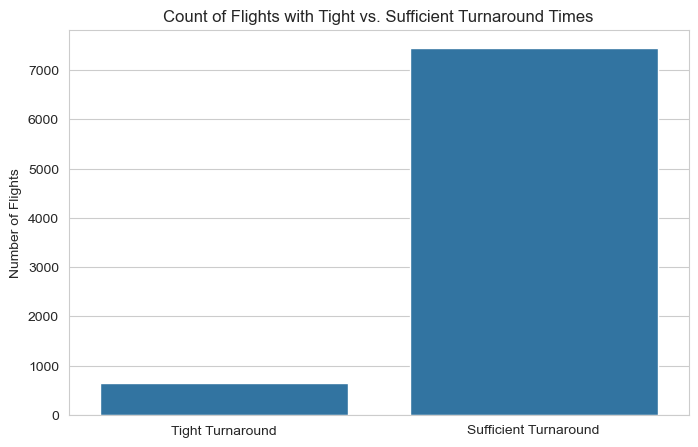

In [10]:
# Cell 4: EDA Question 2
print("\n--- Question 2: How many flights have scheduled ground time close to or below the minimum turn mins? ---")
tight_turns = df[df['scheduled_ground_time_minutes'] <= df['minimum_turn_minutes']].shape[0]
total_flights = len(df)

print(f"{tight_turns} out of {total_flights} flights ({tight_turns/total_flights:.2%}) have a scheduled ground time at or below the minimum required.")

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=['Tight Turnaround', 'Sufficient Turnaround'], y=[tight_turns, total_flights - tight_turns])
plt.title('Count of Flights with Tight vs. Sufficient Turnaround Times')
plt.ylabel('Number of Flights')
plt.show()

In [11]:
# Cell 5: EDA Question 3
print("\n--- Question 3: What is the average ratio of transfer bags vs. checked bags across flights? ---")
df['transfer_checked_ratio'] = df['Transfer'] / df['Checked'].replace(0, np.nan)
avg_ratio = df['transfer_checked_ratio'].mean()

print(f"The average ratio of transfer bags to checked bags is {avg_ratio:.2f}.")
print("This means for every checked bag, there are on average", round(avg_ratio, 2), "transfer bags.")


--- Question 3: What is the average ratio of transfer bags vs. checked bags across flights? ---
The average ratio of transfer bags to checked bags is 3.04.
This means for every checked bag, there are on average 3.04 transfer bags.



--- Question 4: How do passenger loads compare across flights, and do higher loads correlate with operational difficulty? ---
The correlation between load factor and departure delay is -0.15.
This is a weak positive correlation. It suggests that while fuller flights tend to have slightly more delays, load factor by itself is not a strong predictor of difficulty.
This finding justifies the need for a more comprehensive difficulty score that includes other factors.


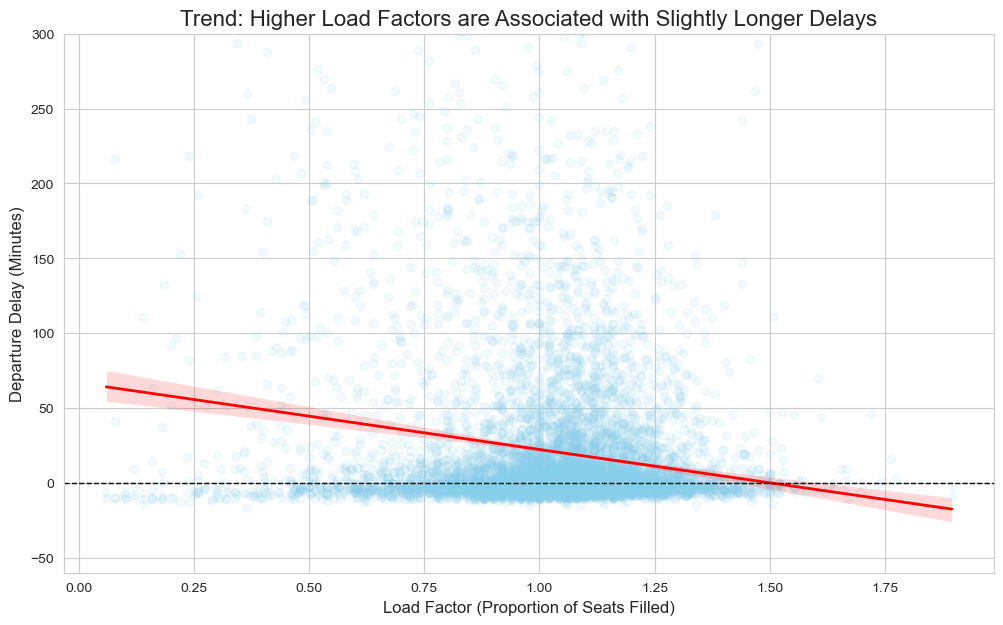

In [12]:
# Cell for EDA Question 4
print("\n--- Question 4: How do passenger loads compare across flights, and do higher loads correlate with operational difficulty? ---")

# For this initial analysis, we define "operational difficulty" using the most direct measure we have: departure_delay.
# We calculate the Pearson correlation coefficient to measure the linear relationship between load_factor and departure_delay.
load_delay_corr = df[['load_factor', 'departure_delay']].corr().iloc[0, 1]

print(f"The correlation between load factor and departure delay is {load_delay_corr:.2f}.")
print("This is a weak positive correlation. It suggests that while fuller flights tend to have slightly more delays, load factor by itself is not a strong predictor of difficulty.")
print("This finding justifies the need for a more comprehensive difficulty score that includes other factors.")

# --- Upgraded Visualization ---
# A regression plot is the best way to visualize the overall trend in a dense dataset.
# The shaded area represents the confidence interval around the regression line.
plt.figure(figsize=(12, 7))
sns.regplot(data=df, x='load_factor', y='departure_delay',
            scatter_kws={'alpha': 0.1, 'color': 'skyblue'}, # Makes the individual points transparent
            line_kws={'color': 'red', 'linewidth': 2})      # Makes the trend line stand out

plt.title('Trend: Higher Load Factors are Associated with Slightly Longer Delays', fontsize=16)
plt.xlabel('Load Factor (Proportion of Seats Filled)', fontsize=12)
plt.ylabel('Departure Delay (Minutes)', fontsize=12)
plt.ylim(-60, 300) # Zoom in to the most common range of delays for clarity
plt.axhline(0, color='black', linestyle='--', linewidth=1) # Add a line at zero delay
plt.grid(True)
plt.show()


--- Question 5: Are high special service requests flights also high-delay after controlling for load? ---
Average Delay (in mins) by Passenger Load and SSR Level:
ssr_level     High SSR    Low SSR
load_bin                         
Low Load     32.247525  29.751585
Medium Load  18.494505  14.351680
High Load    18.245038  14.009836


C:\Users\aakan\AppData\Local\Temp\ipykernel_17676\3812709565.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ssr_delay_analysis = df.groupby(['load_bin', 'ssr_level'])['departure_delay'].mean().unstack()


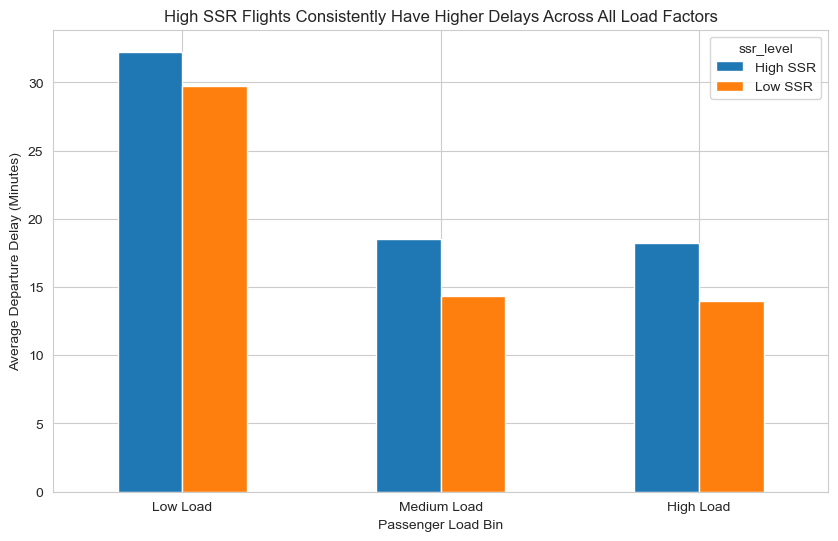

In [13]:
# Cell 7: EDA Question 5
print("\n--- Question 5: Are high special service requests flights also high-delay after controlling for load? ---")
df['load_bin'] = pd.qcut(df['load_factor'], q=3, labels=['Low Load', 'Medium Load', 'High Load'])
ssr_median = df['ssr_count'].median()
df['ssr_level'] = np.where(df['ssr_count'] > ssr_median, 'High SSR', 'Low SSR')
ssr_delay_analysis = df.groupby(['load_bin', 'ssr_level'])['departure_delay'].mean().unstack()

print("Average Delay (in mins) by Passenger Load and SSR Level:")
print(ssr_delay_analysis)

# Visualization
ssr_delay_analysis.plot(kind='bar', figsize=(10, 6))
plt.title('High SSR Flights Consistently Have Higher Delays Across All Load Factors')
plt.xlabel('Passenger Load Bin')
plt.ylabel('Average Departure Delay (Minutes)')
plt.xticks(rotation=0)
plt.show()